In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("car_price.csv")
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
print(df['Fuel_Type'].unique())
print(df['Selling_type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [7]:
encoder = LabelEncoder()
df['Fuel_Type'] = encoder.fit_transform(df["Fuel_Type"])
df['Selling_type'] = encoder.fit_transform(df["Selling_type"])
df['Transmission'] = encoder.fit_transform(df["Transmission"])
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [8]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)

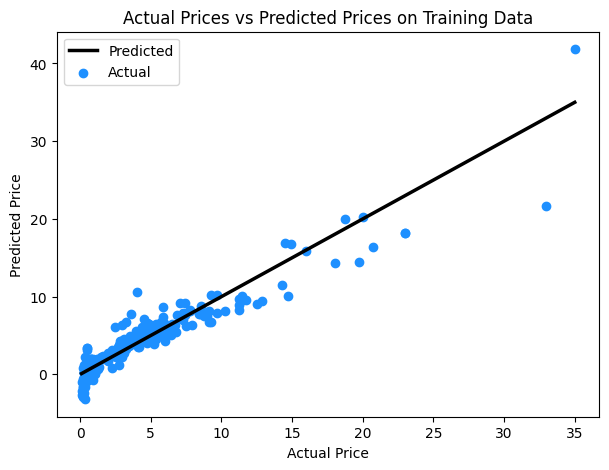

In [11]:
plt.figure(figsize=(7,5))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='solid', lw=2.5, label='Predicted')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.scatter(y_train, y_pred_train, color='dodgerblue', marker='o', label='Actual')
plt.title("Actual Prices vs Predicted Prices on Training Data")
plt.legend()
plt.show()

In [12]:
r2_score_train = r2_score(y_train, y_pred_train)
print("R squared Error : ", r2_score_train)

R squared Error :  0.8836563703329277


In [13]:
y_pred_test = model.predict(X_test)

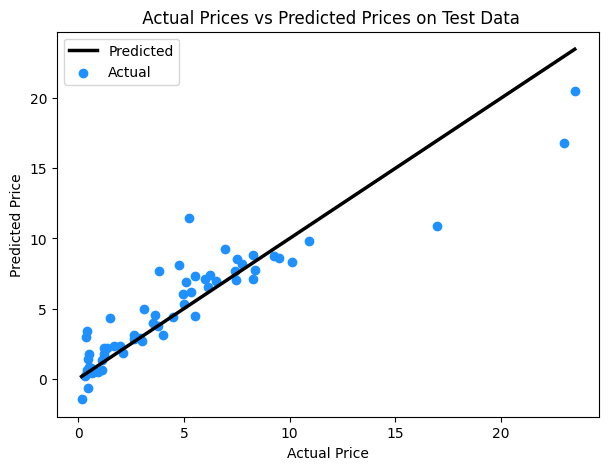

In [14]:
plt.figure(figsize=(7,5))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='solid', lw=2.5, label='Predicted')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.scatter(y_test, y_pred_test, color='dodgerblue', marker='o', label='Actual')
plt.title(" Actual Prices vs Predicted Prices on Test Data")
plt.legend()
plt.show()

In [15]:
r2_score_test = r2_score(y_test, y_pred_test)
print("R squared Error : ", r2_score_test)

R squared Error :  0.8466902419662664
